In [ ]:
import pandas as pd 
import numpy as np

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zoo_info = open("/content/drive/MyDrive/учеба/dataanal/zoo.names", "r")
zoo_info.readlines()

['1. Title: Zoo database\n',
 '\n',
 '2. Source Information\n',
 '   -- Creator: Richard Forsyth\n',
 '   -- Donor: Richard S. Forsyth \n',
 '             8 Grosvenor Avenue\n',
 '             Mapperley Park\n',
 '             Nottingham NG3 5DX\n',
 '             0602-621676\n',
 '   -- Date: 5/15/1990\n',
 ' \n',
 '3. Past Usage:\n',
 "   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.\n",
 '\n',
 '4. Relevant Information:\n',
 '   -- A simple database containing 17 Boolean-valued attributes.  The "type"\n',
 '      attribute appears to be the class attribute.  Here is a breakdown of\n',
 '      which animals are in which type: (I find it unusual that there are\n',
 '      2 instances of "frog" and one of "girl"!)\n',
 '\n',
 '      Class# Set of animals:\n',
 '      ====== ===============================================================\n',
 '           1 (41) aardvark, antelope, bear, boar, buffalo, calf,\n',
 '                  cavy, cheetah, deer, dolph

In [ ]:
animals = pd.read_csv("/content/drive/MyDrive/учеба/dataanal/zoo.data",sep=",")

Приведем датасет к читаемому виду

In [ ]:
animals.rename(columns={'aardvark' : 'animal_name', '1' : 'hair', '0':'feathers', '0.1':'eggs','1.1':'milk','0.2':'airborne','0.3':'aquatic','1.2':'predator','1.3':'toothed', '1.4':'backbone','1.5':'breathes','0.4':'venomus','0.5':'fins','4':'legs','0.6':'tail','0.7':'domestic','1.6':'catsize','1.7':'type'}, inplace=True)

In [ ]:
animals[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomus',
       'fins', 'tail', 'domestic', 'catsize']] = animals[['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomus',
       'fins', 'tail', 'domestic', 'catsize']].astype(bool)

In [ ]:
animals[animals['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomus,fins,legs,tail,domestic,catsize,type
84,starfish,False,False,True,False,False,True,True,False,False,False,False,False,5,False,False,False,7


In [ ]:
#Размер датасета (количество строк, количество столбцов)
animals.shape

(100, 18)

In [ ]:
animals.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomus',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   hair         100 non-null    bool  
 2   feathers     100 non-null    bool  
 3   eggs         100 non-null    bool  
 4   milk         100 non-null    bool  
 5   airborne     100 non-null    bool  
 6   aquatic      100 non-null    bool  
 7   predator     100 non-null    bool  
 8   toothed      100 non-null    bool  
 9   backbone     100 non-null    bool  
 10  breathes     100 non-null    bool  
 11  venomus      100 non-null    bool  
 12  fins         100 non-null    bool  
 13  legs         100 non-null    int64 
 14  tail         100 non-null    bool  
 15  domestic     100 non-null    bool  
 16  catsize      100 non-null    bool  
 17  type         100 non-null    int64 
dtypes: bool(15), int64(2), object(1)
memory usage: 3.9+ KB


Изначально мы хотели предсказывать домашнее животное или нет, но первичный анализ, представленный ниже показал, что на этих данных делать так нецелесообразно

In [ ]:
animals['domestic'].value_counts() #слишком мало строк с True флагом

False    87
True     13
Name: domestic, dtype: int64

Text(0.5, 1.0, 'Распределение на домашних и диких животных')

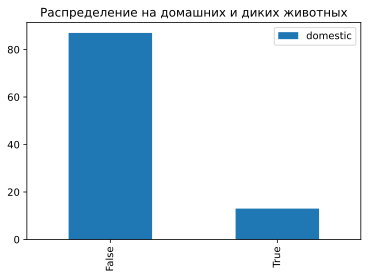

In [ ]:
animals['domestic'].value_counts().plot(kind = 'bar', label = 'domestic') 
plt.legend() 
plt.title("Распределение на домашних и диких животных")

In [ ]:
animals.describe(include=['object', 'bool'])

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomus,fins,tail,domestic,catsize
count,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
unique,99,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,frog,False,False,True,False,False,False,True,True,True,True,False,False,True,False,False
freq,2,58,80,59,60,76,64,55,60,82,79,92,83,75,87,57


In [ ]:
animals.describe()

,legs,type
count,100.000000,100.000000
mean,2.830000,2.850000
std,2.040276,2.105188
min,0.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,4.000000,4.000000
max,8.000000,7.000000


In [ ]:
animals['legs'].value_counts()

4    37
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64

In [ ]:
animals[animals['legs'] == 5] #проверим что за животное с 5 ногами

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomus,fins,legs,tail,domestic,catsize,type
84,starfish,False,False,True,False,False,True,True,False,False,False,False,False,5,False,False,False,7


In [ ]:
animals['legs'].mean() #2.83 ноги в среднем :)

2.83

In [ ]:
animals['type'].value_counts(normalize=True)

1    0.40
2    0.20
4    0.13
7    0.10
6    0.08
3    0.05
5    0.04
Name: type, dtype: float64

Мы решили что на данном дата сете интереснее всего предсказывать к какому из 7 классов принадлежит конкретное животное, хотя распределение и не равномерное

In [ ]:
pd.crosstab([animals['predator'], animals['venomus']], animals['type'])
#pd.crosstab([df2['director_name'], df2['genres']], df2['country'])

type               1   2  3  4  5  6  7
predator venomus                       
False    False    19  11  1  4  1  5  2
         True      0   0  0  0  0  2  0
True     False    21   9  2  8  2  1  6
         True      0   0  2  1  1  0  2

In [ ]:
pd.crosstab([animals['eggs'],animals['milk']],animals['type'])

type          1   2  3   4  5  6  7
eggs  milk                         
False False   0   0  1   0  0  0  1
      True   39   0  0   0  0  0  0
True  False   0  20  4  13  4  8  9
      True    1   0  0   0  0  0  0

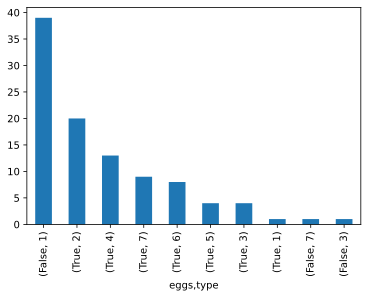

In [ ]:
animals[['eggs', 'type']].value_counts().plot(kind = 'bar')

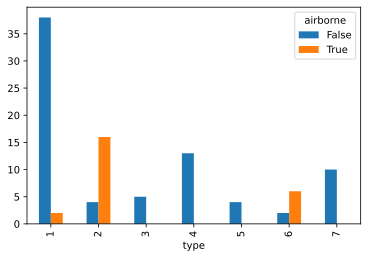

In [ ]:
pd.crosstab(animals['type'],animals['airborne']).plot(kind = 'bar')

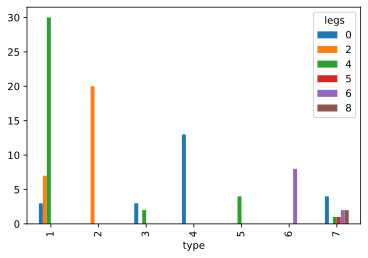

In [ ]:
pd.crosstab(animals['type'], animals['legs']).plot(kind = 'bar')

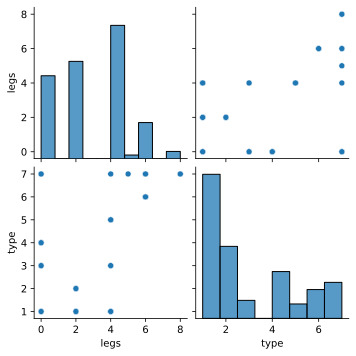

In [ ]:
cols = ['legs','type']
sns.pairplot(animals[cols])

In [ ]:
pd.crosstab(animals['domestic'],animals['predator'], normalize=True)

predator,False,True
domestic,,
False,0.34,0.53
True,0.11,0.02


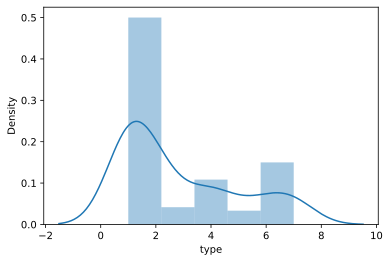

In [ ]:
sns.distplot(animals.type)

In [ ]:
animals['domestic'].value_counts()

False    87
True     13
Name: domestic, dtype: int64

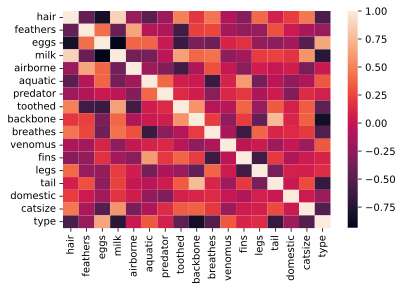

In [ ]:
sns.heatmap(animals.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef8042b250>,
      dtype=object)

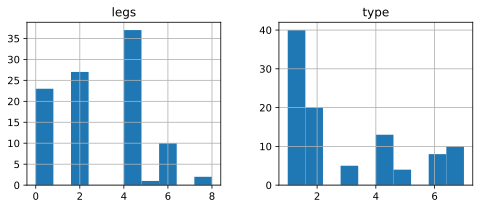

In [ ]:
animals[['legs','type']].hist(figsize=(8,3))

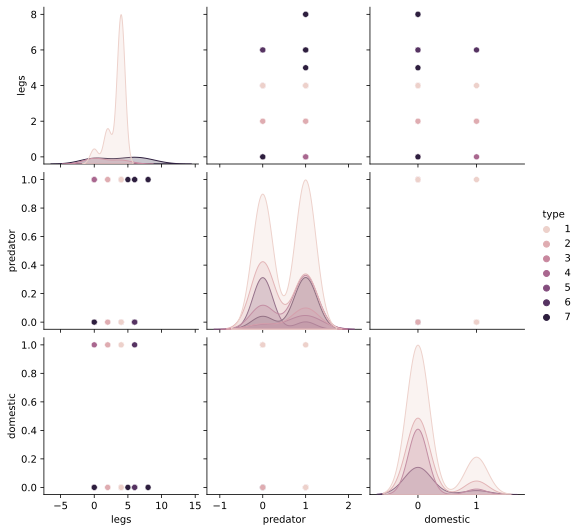

In [ ]:
sns.pairplot(animals[['legs', 'type', 'predator', 'domestic']], hue = 'type')

In [ ]:
from sklearn.metrics import accuracy_score

Подготовка данных

*Анализ* типа животного

In [ ]:
animals2 = pd.read_csv("/content/drive/MyDrive/учеба/dataanal/zoo.data",sep=",")

Приведем датасет к читаемому виду

In [ ]:
animals2.rename(columns={'aardvark' : 'animal_name', '1' : 'hair', '0':'feathers', '0.1':'eggs','1.1':'milk','0.2':'airborne','0.3':'aquatic','1.2':'predator','1.3':'toothed', '1.4':'backbone','1.5':'breathes','0.4':'venomus','0.5':'fins','4':'legs','0.6':'tail','0.7':'domestic','1.6':'catsize','1.7':'type'}, inplace=True)

In [ ]:
features = list(set(animals.columns) - set(['animal_name','legs','type']))
features

['hair',
 'milk',
 'breathes',
 'catsize',
 'fins',
 'tail',
 'feathers',
 'toothed',
 'eggs',
 'domestic',
 'backbone',
 'venomus',
 'airborne',
 'aquatic',
 'predator']

In [ ]:
x_animals = animals2

x_animals[features] = x_animals[features].astype('int')


y_animals = x_animals['type']
x_animals.drop(['animal_name','type'],axis=1,inplace=True)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_animals.values, y_animals, test_size=0.30, random_state = 10, stratify = y_animals)


In [ ]:
y_test.value_counts(normalize=True)

1    0.400000
2    0.200000
4    0.133333
7    0.100000
6    0.066667
3    0.066667
5    0.033333
Name: type, dtype: float64

In [ ]:
y_train.value_counts(normalize=True)

1    0.400000
2    0.200000
4    0.128571
7    0.100000
6    0.085714
5    0.042857
3    0.042857
Name: type, dtype: float64

Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_perdict = tree.predict(x_test)
accuracy_score(y_test, tree_perdict)  #0.9(6)

0.9666666666666667

In [ ]:
tree_perdict

array([1, 3, 1, 1, 7, 2, 3, 4, 1, 3, 2, 1, 1, 1, 2, 4, 4, 1, 1, 1, 1, 7,
       4, 2, 2, 6, 6, 2, 7, 1])

Найдем лучшие параметры для дерева

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

Снова сделаем и протестируем дерево

In [ ]:
tree_grid.fit(x_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    2.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'ma

In [ ]:
tree_grid.best_params_

{'max_depth': 9, 'max_features': 15}

In [ ]:
tree_grid.best_score_

0.9714285714285715

In [66]:
tree_grid_perdict = tree_grid.predict(x_test)
accuracy_score(y_test, tree_grid_perdict)  #0.9(6)

0.9666666666666667

In [65]:
import graphviz
from sklearn.tree import export_graphviz

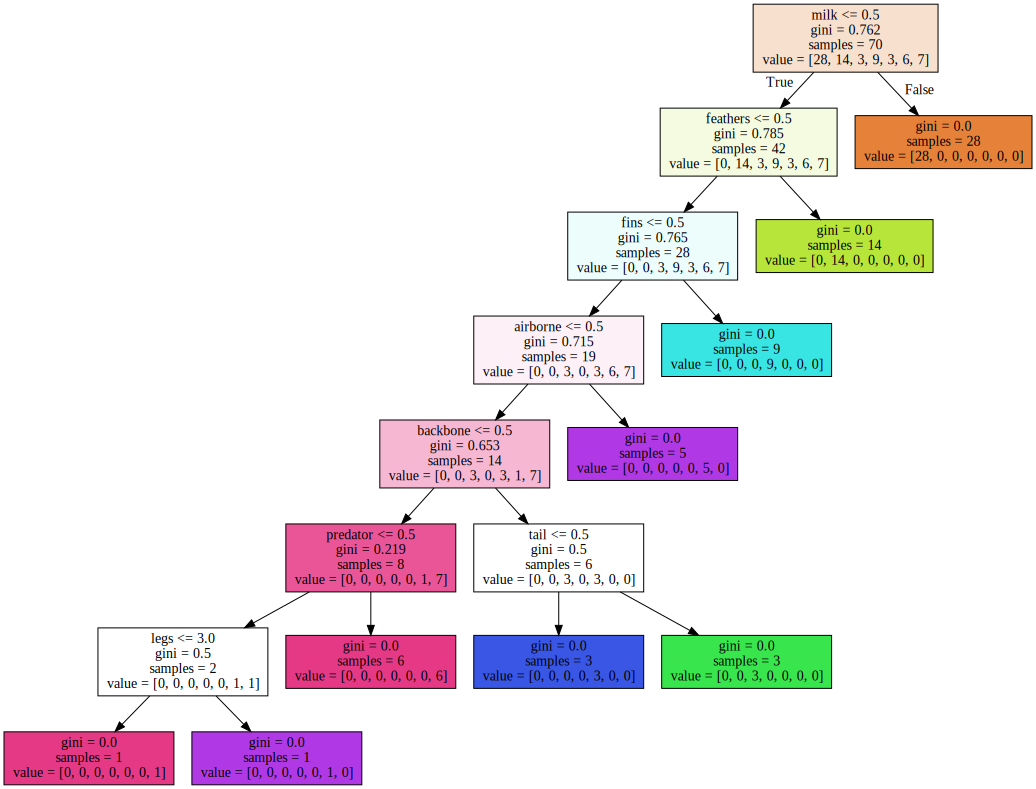

In [67]:
dot_data  = export_graphviz(tree, feature_names=x_animals.columns, 
out_file=None, filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

Дерево после тюнинга

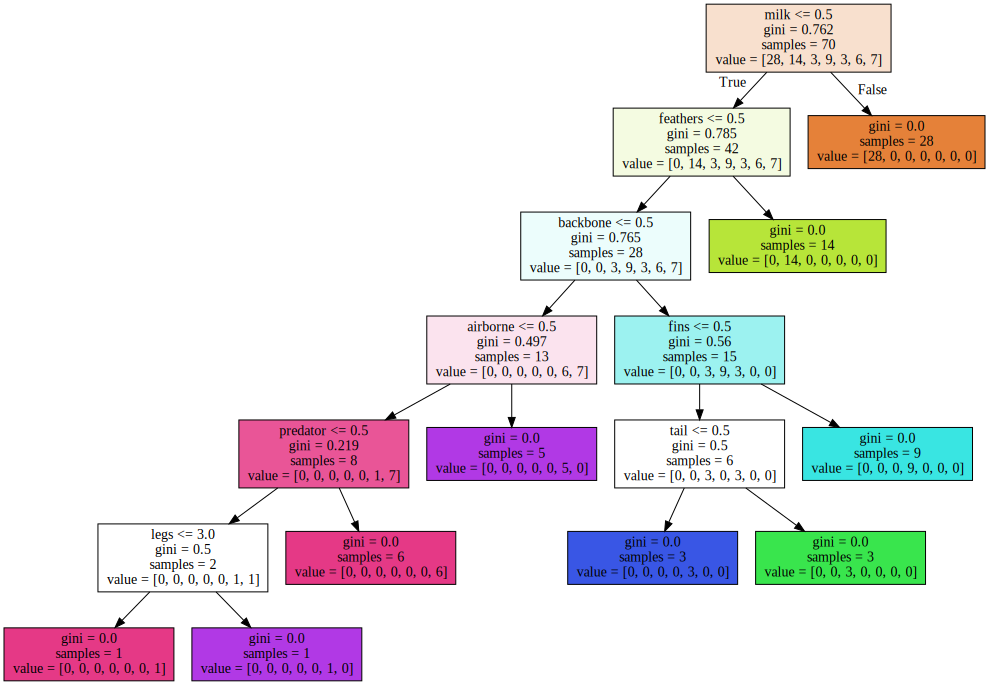

In [69]:
dot_data  = export_graphviz(tree_grid.best_estimator_, feature_names=x_animals.columns, 
out_file=None, filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

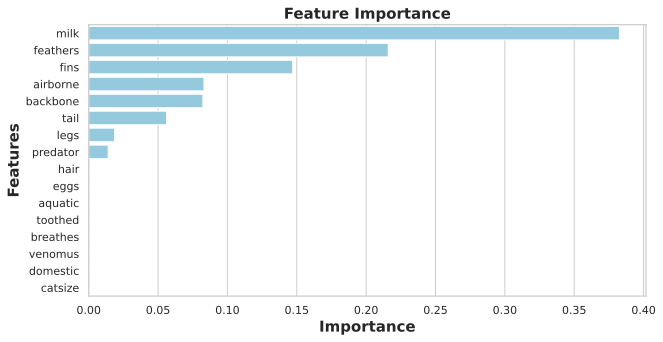

None

,Features,Gini-Importance
0,milk,0.382584
1,feathers,0.215917
2,fins,0.147075
3,airborne,0.083117
4,backbone,0.082307
5,tail,0.056210
6,legs,0.018737
7,predator,0.014052
8,hair,0.000000
9,eggs,0.000000


In [71]:
feats = {}
for feature, importance in zip(animals2.columns, tree.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=15, weight = 'bold')
plt.ylabel('Features', fontsize=15, weight = 'bold')
plt.title('Feature Importance', fontsize=15, weight = 'bold')
display(plt.show())
display(importances)

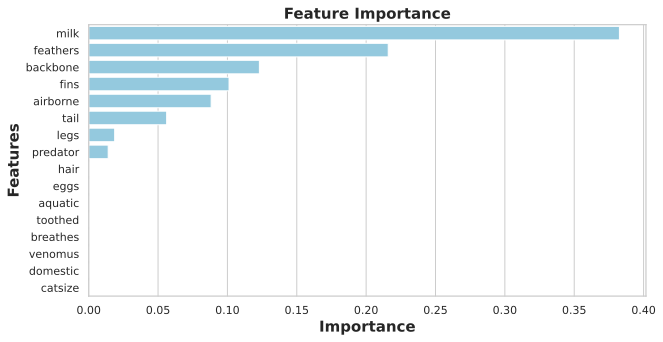

None

,Features,Gini-Importance
0,milk,0.382584
1,feathers,0.215917
2,backbone,0.123044
3,fins,0.101178
4,airborne,0.088278
5,tail,0.056210
6,legs,0.018737
7,predator,0.014052
8,hair,0.000000
9,eggs,0.000000


In [72]:
feats = {}
for feature, importance in zip(animals2.columns, tree_grid.best_estimator_.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=15, weight = 'bold')
plt.ylabel('Features', fontsize=15, weight = 'bold')
plt.title('Feature Importance', fontsize=15, weight = 'bold')
display(plt.show())
display(importances)

KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
knn_predict = knn.predict(x_test)
accuracy_score(y_test,knn_predict) #0.7(3)

0.7333333333333333

Поищем результат получше

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [80]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [81]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [82]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=10, n_jobs=-1,
verbose=True)

In [84]:
knn_grid.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    6.0s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
            

In [85]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, 0.9285714285714285)

In [87]:
knn_grid_predict = knn_grid.predict(x_test)
accuracy_score(y_test,knn_grid_predict) #0.9(6)

0.9666666666666667

случайный лес


In [88]:
from sklearn.ensemble import  RandomForestClassifier

In [100]:
random_forest = RandomForestClassifier(n_estimators=15, random_state=1)
random_forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [101]:
random_forest_predict = random_forest.predict(x_test)

In [102]:
accuracy_score(y_test,random_forest_predict)

1.0

Важность признаков

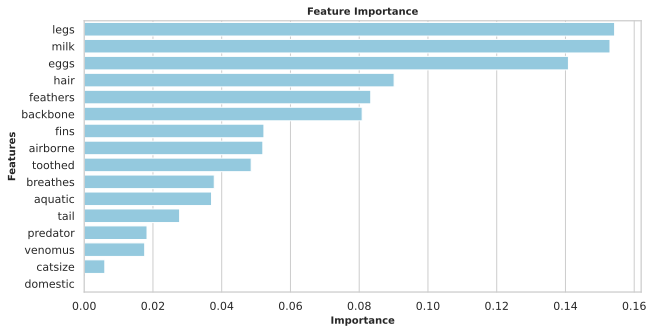

None

,Features,Gini-Importance
0,legs,0.154306
1,milk,0.152952
2,eggs,0.140865
3,hair,0.090154
4,feathers,0.083365
5,backbone,0.080858
6,fins,0.052282
7,airborne,0.051971
8,toothed,0.048576
9,breathes,0.037832


In [103]:
feats = {}
for feature, importance in zip(animals2.columns, random_forest.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=10, weight = 'bold')
plt.ylabel('Features', fontsize=10, weight = 'bold')
plt.title('Feature Importance', fontsize=10, weight = 'bold')
display(plt.show())
display(importances)

Попробуем подобрать параметры получше для леса

In [104]:
forest_params = {'max_depth' : range(1,20), 'max_features' : range(3,30)}
forest_grid = GridSearchCV(random_forest,forest_params, cv=5, n_jobs=-1, verbose=True)

In [106]:
forest_grid.fit(x_train,y_train)

Fitting 5 folds for each of 513 candidates, totalling 2565 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 2550 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done 2565 out of 2565 | elapsed:   36.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=15, n_jobs=None,
                                              oob_score=False, random_state=1,
                                    

In [107]:
forest_grid.best_params_, forest_grid.best_score_

({'max_depth': 6, 'max_features': 15}, 0.9571428571428573)

In [109]:
forest_grid_predict = forest_grid.predict(x_test)
accuracy_score(y_test,forest_grid_predict) #0.9(3)

0.9333333333333333

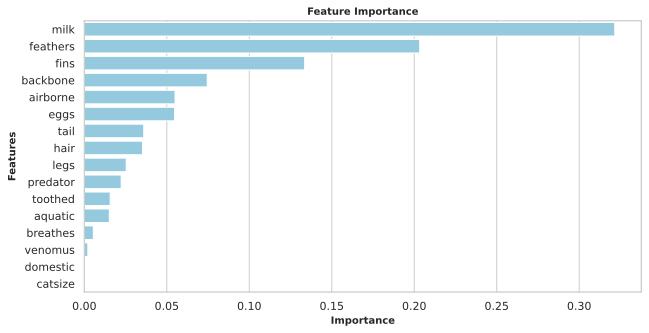

None

,Features,Gini-Importance
0,milk,0.321568
1,feathers,0.203319
2,fins,0.133568
3,backbone,0.074501
4,airborne,0.054990
5,eggs,0.054710
6,tail,0.036021
7,hair,0.035284
8,legs,0.025369
9,predator,0.022327


In [110]:
feats = {}
for feature, importance in zip(animals2.columns, forest_grid.best_estimator_.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=10, weight = 'bold')
plt.ylabel('Features', fontsize=10, weight = 'bold')
plt.title('Feature Importance', fontsize=10, weight = 'bold')
display(plt.show())
display(importances)

SVM

In [111]:
from sklearn import svm

In [112]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
svm_predict = svm_model.predict(x_test)
svm_predict

array([1, 4, 1, 1, 7, 2, 5, 4, 1, 1, 2, 1, 1, 1, 2, 4, 4, 4, 4, 4, 1, 7,
       4, 2, 2, 6, 6, 2, 7, 1])

In [115]:
accuracy_score(y_test, svm_predict) 0.8(3)

0.8333333333333334

Вывод: лучше всего на данной выборке показывают себя дерево, knn и лес